# 3B: Genome-scale Modeling
## This notebook shows the code and calculations used to determine:
### - Growth rates
### - Hierarchy of constraints

(Figures 2 and Table 2 in the manuscript)

In [1]:
import pandas as pd
import numpy as np
import csv
import cobra
import math as m
from cobra.core.metabolite import elements_and_molecular_weights
elements_and_molecular_weights['R']=0.0
elements_and_molecular_weights['Z']=0.0
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import fcns.modeling_functions as fcns

## Simulation setup
### For simplicity, the majority of the code is included as functions called in this notebook. Please see the included modeling_functions.py file for the detailed code

In [2]:
## Growth rate simulations (this can take some time)
LL_model = cobra.io.load_json_model('LL_base_iLB1035.json')
LL_Fig2 = fcns.figure_2LL(LL_model)
LL_Fig2['Light']='LL'
HL_model = cobra.io.load_json_model('HL_base_iLB1035.json')
HL_Fig2 = fcns.figure_2HL(HL_model)
HL_Fig2['Light']='HL'
HL_Fig2_bicarb = fcns.figure_2HL_HCO3(HL_model)
HL_Fig2_bicarb['Light']='HL+bicarb'

F:\Dropbox (UCSD SBRG)\Jareds folders and files\Jareds Projects\1_In progress\Phototroph homeostasis\1_Manuscript_2020\Modeling_only\Final_Data_Source\Manuscript\Final Draft\Data and code\3_Genome-scale_Modeling\fcns\modeling_functions.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  photon_usage[str(t)]['Absorbed']=total_absorbed
F:\Dropbox (UCSD SBRG)\Jareds folders and files\Jareds Projects\1_In progress\Phototroph homeostasis\1_Manuscript_2020\Modeling_only\Final_Data_Source\Manuscript\Final Draft\Data and code\3_Genome-scale_Modeling\fcns\modeling_functions.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Categorical plot of Growth Rate for LL, HL and HL + bicarbonate spike correction 
### (Figure 2)

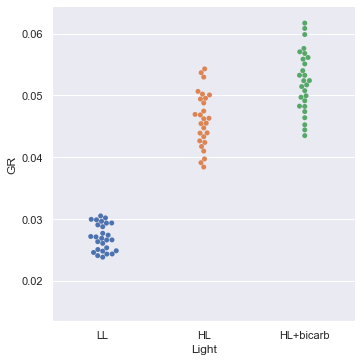

In [3]:
all_data = pd.concat([LL_Fig2,HL_Fig2,HL_Fig2_bicarb])
sns.catplot(x = 'Light', y = 'GR', kind = "swarm", data = all_data)

## Growth rates with different constraints (Table 2)


In [2]:
HL_model = cobra.io.load_json_model('HL_base_iLB1035.json')
HL_hv = fcns.simulate(HL_model,light='HL',photon_const=True,
                       Po_const=False,YII_const=False,D1_const=False,DM20=False)
HL_Po = fcns.simulate(HL_model,light='HL',photon_const=False,
                       Po_const=True,YII_const=False,D1_const=False,DM20=False)
HL_hvPoD1 = fcns.simulate(HL_model,light='HL',photon_const=True,
                       Po_const=True,YII_const=False,D1_const=True,DM20=False)
HL_hvYII = fcns.simulate(HL_model,light='HL',photon_const=True,
                       Po_const=False,YII_const=True,D1_const=False,DM20=False)
HL_hvPoD1YII = fcns.simulate(HL_model,light='HL',photon_const=True,
                       Po_const=True,YII_const=True,D1_const=True,DM20=False)
HL_hvPoDM20 = fcns.simulate(HL_model,light='HL',photon_const=True,
                       Po_const=True,YII_const=False,D1_const=False,DM20=False)

F:\Dropbox (UCSD SBRG)\Jareds folders and files\Jareds Projects\1_In progress\Phototroph homeostasis\1_Manuscript_2020\Modeling_only\Final_Data_Source\Manuscript\Final Draft\Data and code\3_Genome-scale_Modeling\fcns\modeling_functions.py:770: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  photon_usage[str(t)]['Absorbed']=total_absorbed


Growth rate:  0.138
Growth rate:  0.052
Growth rate:  0.052
Growth rate:  0.073
Growth rate:  0.052
Growth rate:  0.052


In [3]:
LL_model = cobra.io.load_json_model('LL_base_iLB1035.json')
LL_hv = fcns.simulate(HL_model,light='LL',photon_const=True,
                       Po_const=False,YII_const=False,D1_const=False,DM20=False)
LL_Po = fcns.simulate(LL_model,light='LL',photon_const=False,
                       Po_const=True,YII_const=False,D1_const=False,DM20=False)
LL_hvPoD1 = fcns.simulate(LL_model,light='LL',photon_const=True,
                       Po_const=True,YII_const=False,D1_const=True,DM20=False)
LL_hvYII = fcns.simulate(LL_model,light='LL',photon_const=True,
                       Po_const=False,YII_const=True,D1_const=False,DM20=False)
LL_hvPoD1YII = fcns.simulate(LL_model,light='LL',photon_const=True,
                       Po_const=True,YII_const=True,D1_const=True,DM20=False)
LL_hvPoDM20 = fcns.simulate(LL_model,light='LL',photon_const=True,
                       Po_const=True,YII_const=False,D1_const=False,DM20=False)

Growth rate:  0.038
Growth rate:  0.027
Growth rate:  0.027
Growth rate:  0.03
Growth rate:  0.027
Growth rate:  0.027
